In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

In [2]:
df1 = pd.read_csv(r'C:\Users\sanand\Documents\XX_Channel_CSV_Files\Channel_CSV_Files\Channel_Data\XX_dils.csv')
df1.head()

,Unnamed: 0,dma_name,week,Vials
0,0,MONTGOMERY,2020-07-03,0.0
1,1,MOBILE-PENSACOLA,2020-07-03,1.0
2,2,"COLUMBUS, GA",2020-07-03,3.0
3,3,BIRMINGHAM,2020-07-03,1.0
4,4,MERIDIAN,2020-07-03,0.0


In [3]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df1.dtypes

dma_name     object
week         object
Vials       float64
dtype: object

In [5]:
df1['week'] = pd.to_datetime(df1['week'])
df1['week']

0       2020-07-03
1       2020-07-03
2       2020-07-03
3       2020-07-03
4       2020-07-03
           ...    
21940   2022-07-01
21941   2022-07-01
21942   2022-07-01
21943   2022-07-01
21944   2022-07-01
Name: week, Length: 21945, dtype: datetime64[ns]

In [6]:
df1.dtypes

dma_name            object
week        datetime64[ns]
Vials              float64
dtype: object

In [7]:
grpd_data = df1.groupby('week').sum('Vials')
grpd_data.head()

,Vials
week,
2020-07-03,229.0
2020-07-10,491.0
2020-07-17,463.0
2020-07-24,461.0
2020-07-31,431.0


<Axes: xlabel='week'>

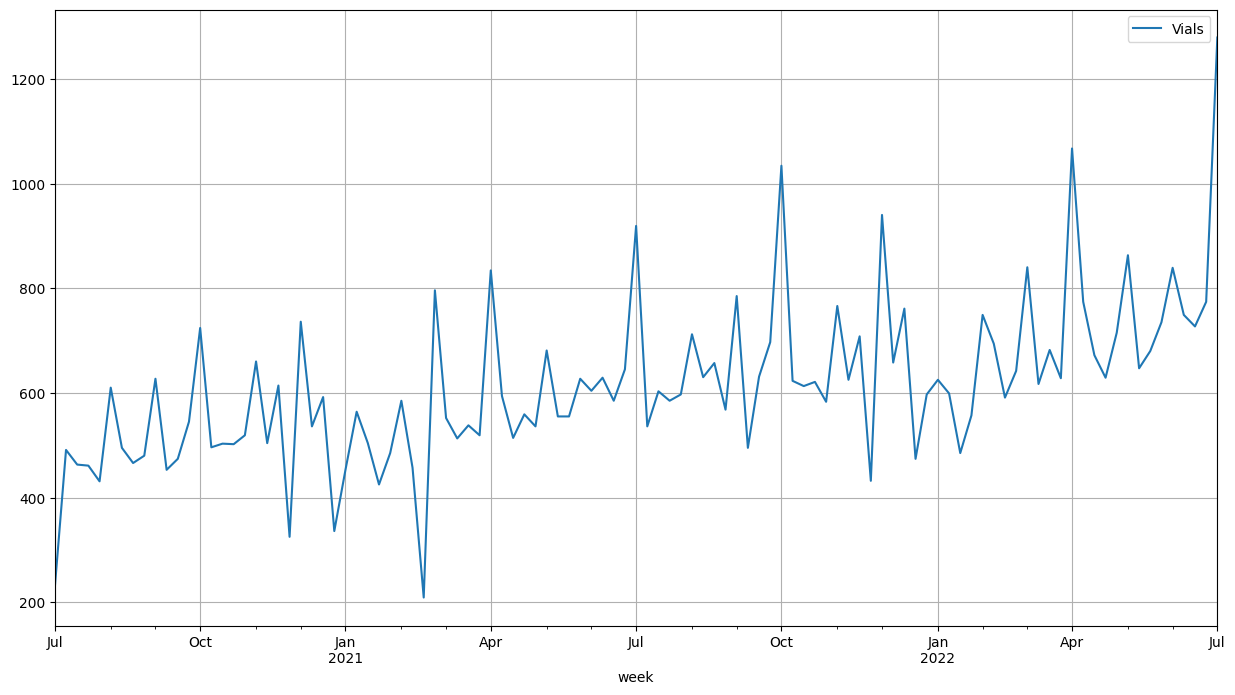

In [8]:
rcParams['figure.figsize'] = 15,8
grpd_data.plot(grid=True)

In [9]:
grpd_data.describe()

,Vials
count,105.000000
mean,614.276190
std,157.055386
min,209.000000
25%,513.000000
50%,603.000000
75%,682.000000
max,1279.000000


## Seasonal Decomposition - Additive Model

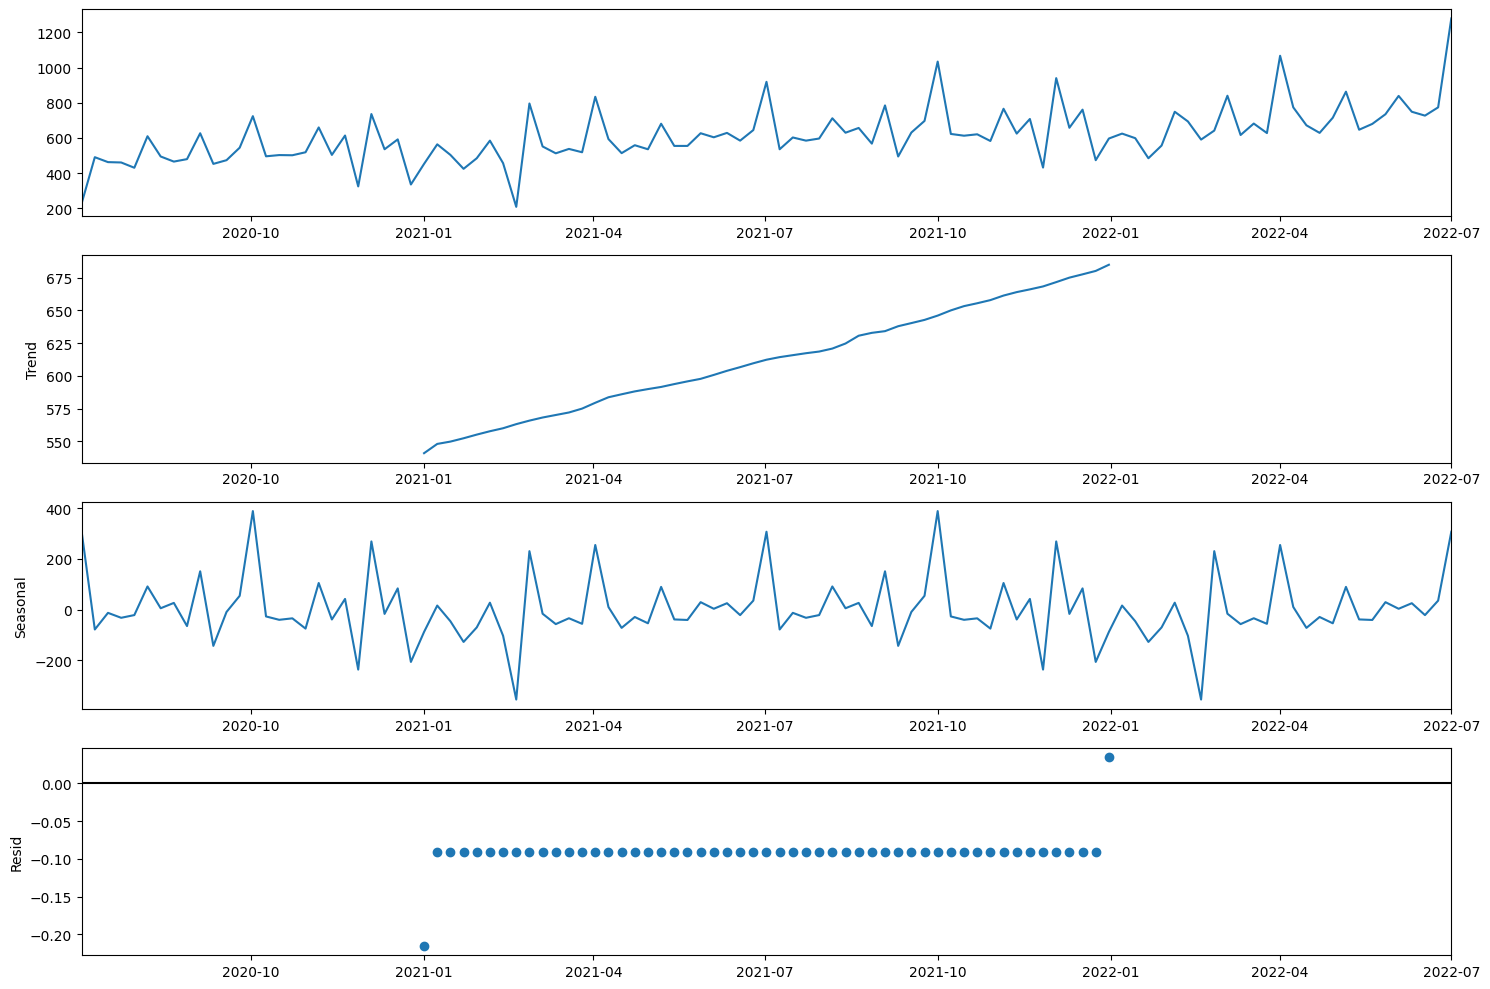

In [10]:
rcParams['figure.figsize'] = 15,10
decomposition = seasonal_decompose(grpd_data, model='additive')
decomposition.plot();  # We require minimum 2 years of datato plot trend and seasonality on the data.i.e. 104 week observations

## Seasonal Decomposition - Multiplicative Model

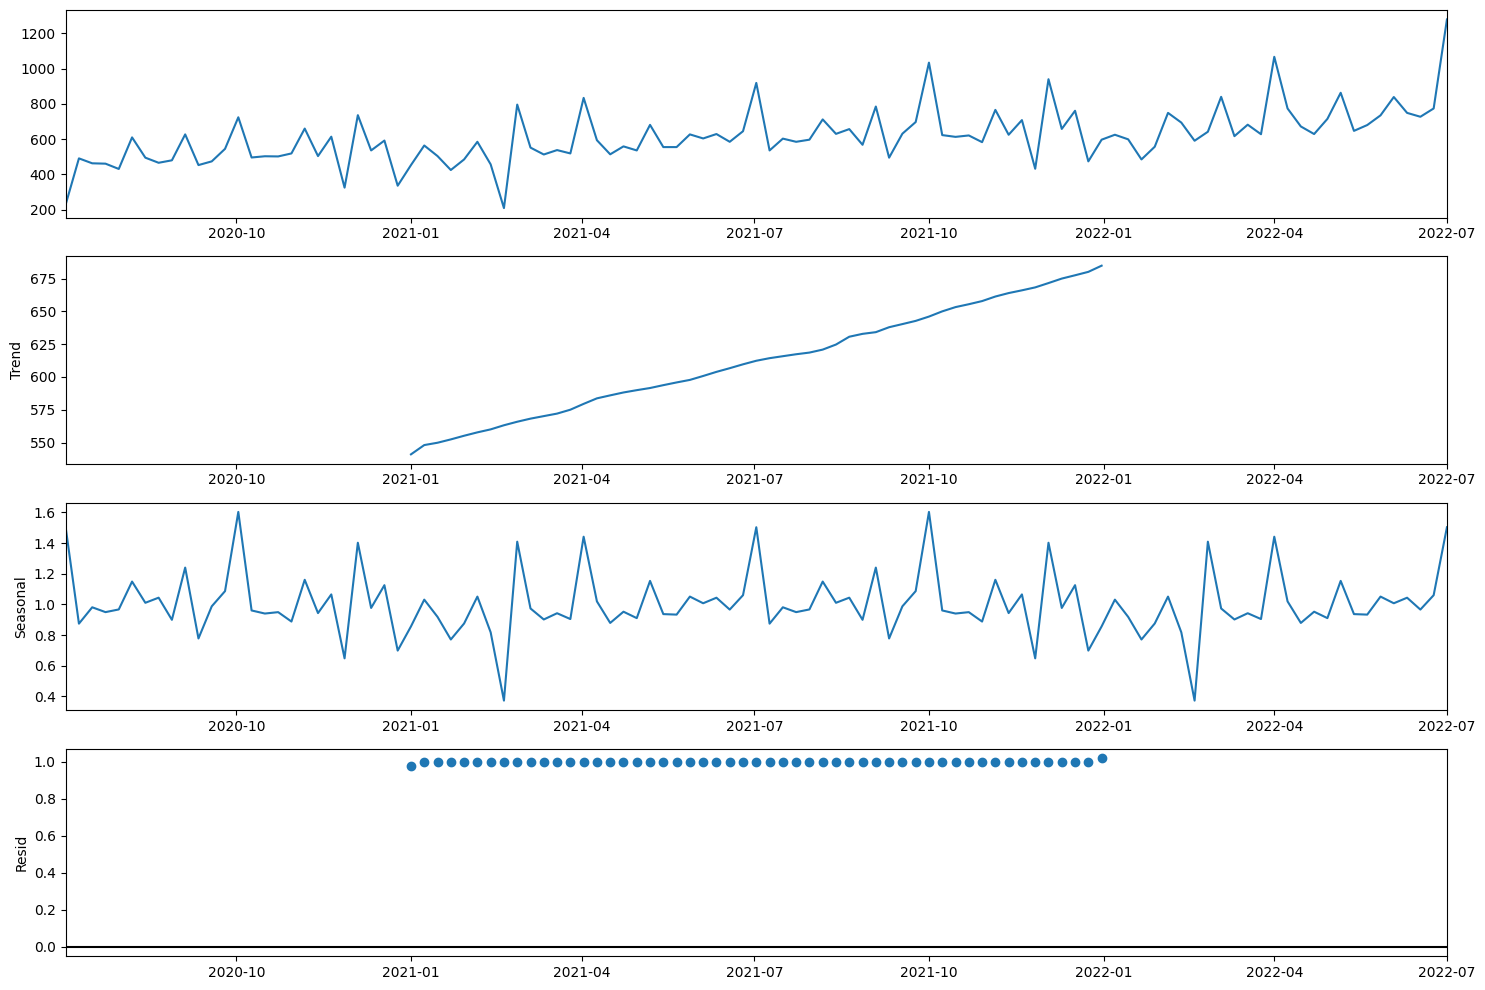

In [11]:
rcParams['figure.figsize'] = 15,10
decomposition = seasonal_decompose(grpd_data, model='multiplicative')
decomposition.plot();

## Train Test Split

In [12]:
train = grpd_data[0:int(len(grpd_data)*0.7)]
test = grpd_data[int(len(grpd_data)*0.7):]

In [13]:
print(train.shape)
print(test.shape)

(73, 1)
(32, 1)


In [14]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.head())

First few rows of Training Data


,Vials
week,
2020-07-03,229.0
2020-07-10,491.0
2020-07-17,463.0
2020-07-24,461.0
2020-07-31,431.0


Last few rows of Training Data


,Vials
week,
2021-10-22,621.0
2021-10-29,583.0
2021-11-05,766.0
2021-11-12,625.0
2021-11-19,708.0


First few rows of Test Data


,Vials
week,
2021-11-26,432.0
2021-12-03,940.0
2021-12-10,658.0
2021-12-17,761.0
2021-12-24,474.0


Last few rows of Test Data


,Vials
week,
2021-11-26,432.0
2021-12-03,940.0
2021-12-10,658.0
2021-12-17,761.0
2021-12-24,474.0


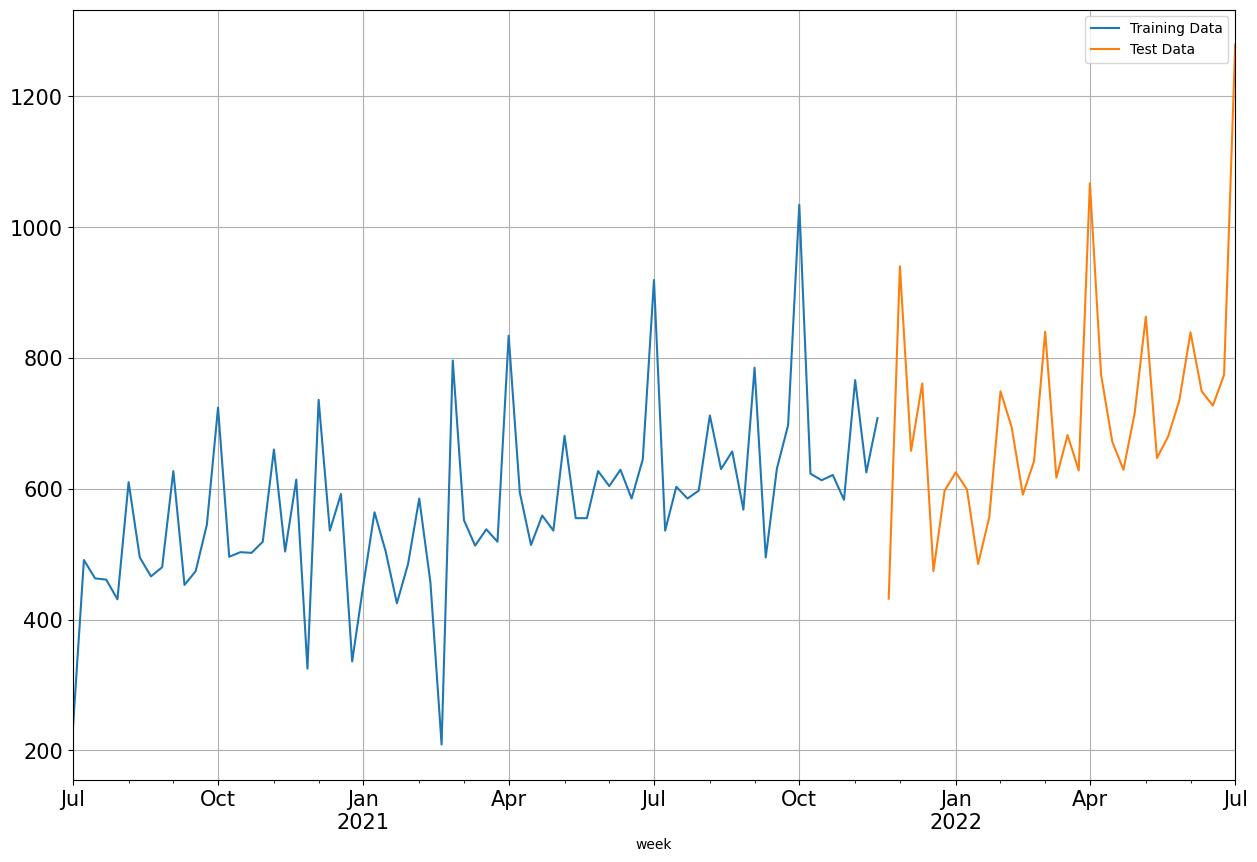

In [15]:
train['Vials'].plot(fontsize=15)
test['Vials'].plot(fontsize=15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics

## Model 1 - Linear Regression

In [16]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+74 for i in range(len(test))]
print('Training Time Instance','\n',train_time)
print('Test Time Instance','\n',test_time)

Training Time Instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
Test Time Instance 
 [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]


In [17]:
LR_Train = train.copy()
LR_Test = test.copy()

In [18]:
LR_Train['Time'] = train_time
LR_Test['Time'] = test_time

display(LR_Train.head())
display(LR_Test.head())

,Vials,Time
week,,
2020-07-03,229.0,1
2020-07-10,491.0,2
2020-07-17,463.0,3
2020-07-24,461.0,4
2020-07-31,431.0,5


,Vials,Time
week,,
2021-11-26,432.0,74
2021-12-03,940.0,75
2021-12-10,658.0,76
2021-12-17,761.0,77
2021-12-24,474.0,78


In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
lr.fit(LR_Train[['Time']],LR_Train['Vials'])

LinearRegression()

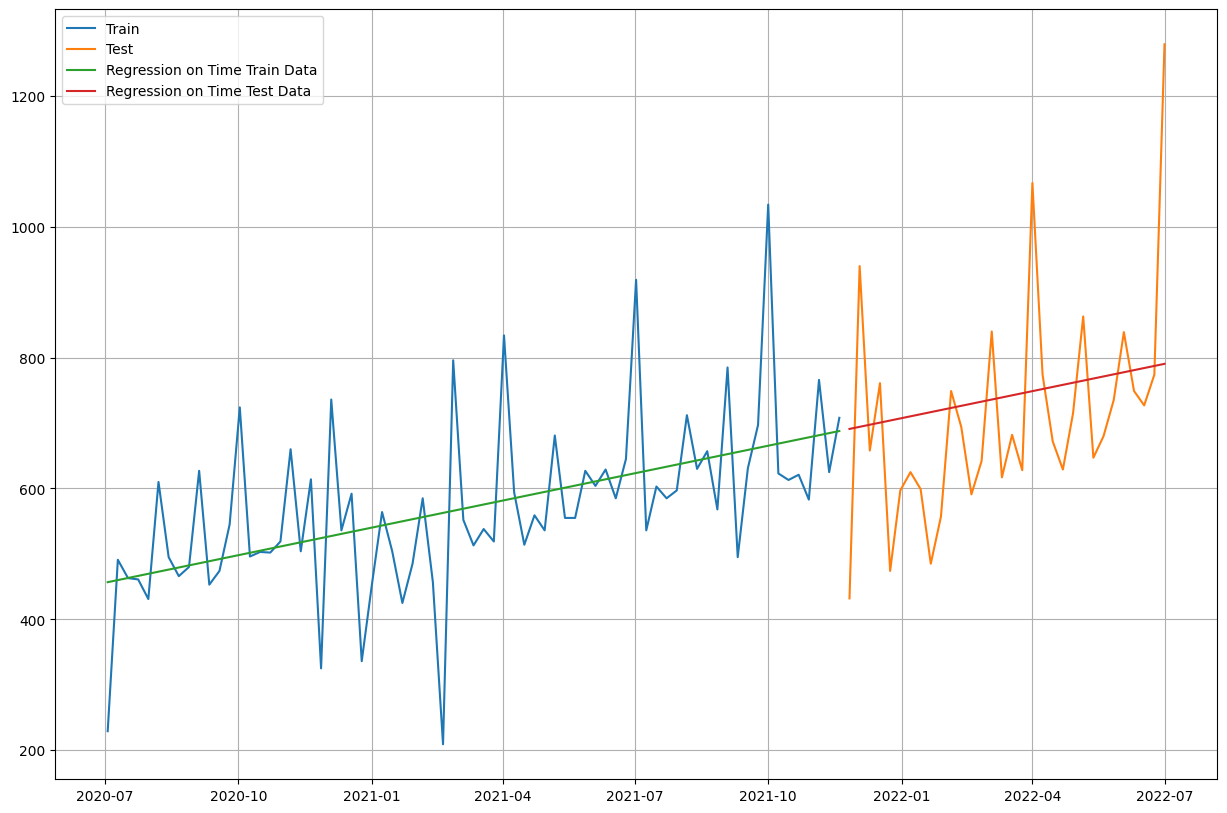

In [21]:
train_prediction_model_1 = lr.predict(LR_Train[['Time']])
LR_Train['RegOnTime'] = train_prediction_model_1

test_prediction_model_1 = lr.predict(LR_Test[['Time']])
LR_Test['RegOnTime'] = test_prediction_model_1

plt.plot(train['Vials'], label='Train')
plt.plot(test['Vials'], label='Test')
plt.plot(LR_Train['RegOnTime'], label = 'Regression on Time Train Data')
plt.plot(LR_Test['RegOnTime'], label = 'Regression on Time Test Data')

plt.legend(loc='best')
plt.grid();

In [22]:
test_prediction_model_1

array([691.03881279, 694.24793286, 697.45705294, 700.66617302,
       703.8752931 , 707.08441318, 710.29353326, 713.50265334,
       716.71177342, 719.9208935 , 723.13001358, 726.33913365,
       729.54825373, 732.75737381, 735.96649389, 739.17561397,
       742.38473405, 745.59385413, 748.80297421, 752.01209429,
       755.22121437, 758.43033444, 761.63945452, 764.8485746 ,
       768.05769468, 771.26681476, 774.47593484, 777.68505492,
       780.894175  , 784.10329508, 787.31241515, 790.52153523])

In [23]:
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Vials'], test_prediction_model_1, squared=False)
print('For Regression Model RMSE is %3.3f'%(rmse_model1_test))

For Regression Model RMSE is 156.048


In [24]:
resultsDF = pd.DataFrame({'Test RMSE': [rmse_model1_test]}, index=['Regression On Time'])
resultsDF

,Test RMSE
Regression On Time,156.048229


## Model 2 : Naive Approach

In [25]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [26]:
NaiveModel_test['Naive'] = np.asarray(train['Vials'])[len(np.array(train['Vials']))-1]
NaiveModel_test['Naive'].head()

week
2021-11-26    708.0
2021-12-03    708.0
2021-12-10    708.0
2021-12-17    708.0
2021-12-24    708.0
Name: Naive, dtype: float64

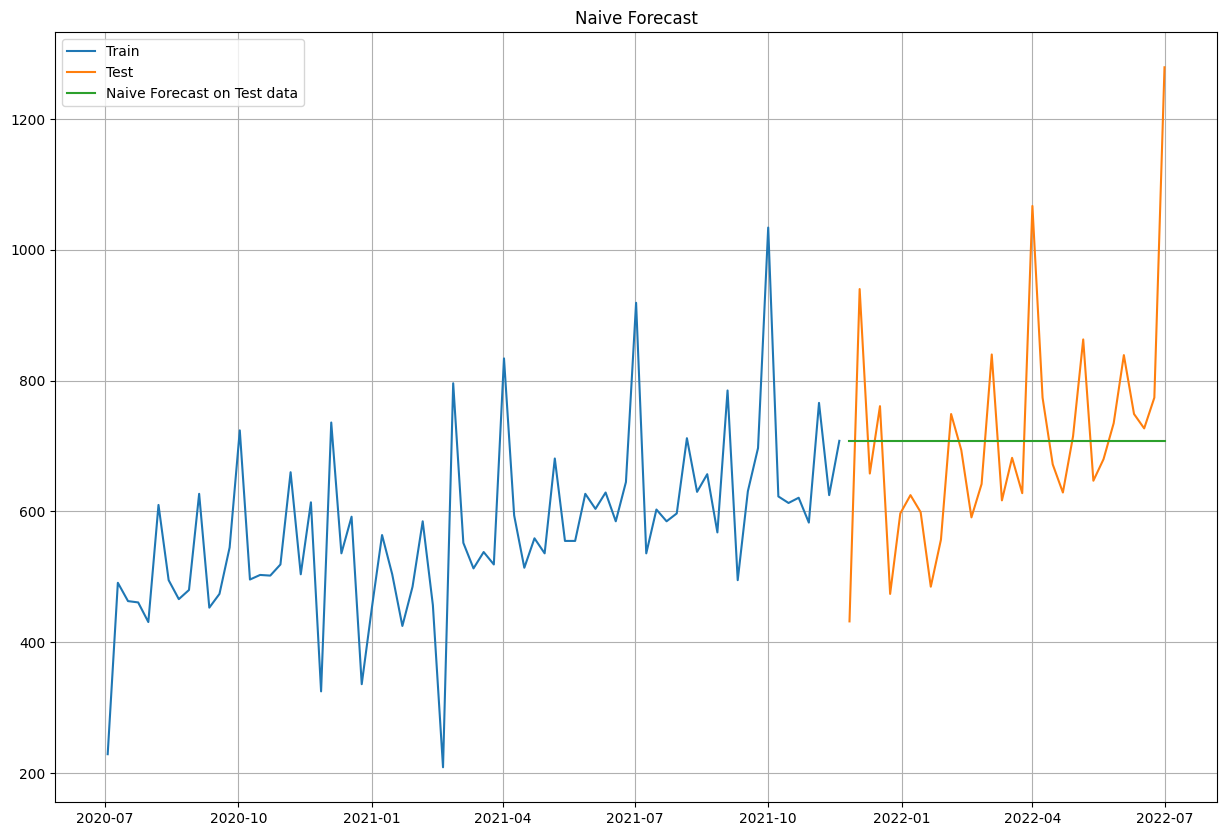

In [27]:
plt.plot(NaiveModel_train['Vials'], label='Train')
plt.plot(NaiveModel_test['Vials'], label='Test')
plt.plot(NaiveModel_test['Naive'], label='Naive Forecast on Test data')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.grid();

In [28]:
rmse_model2_test = metrics.mean_squared_error(test['Vials'], NaiveModel_test['Naive'], squared=False)
print('For Naive Model RMSE is %3.3f'%(rmse_model2_test))

For Naive Model RMSE is 164.514


In [29]:
resultsDF2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]}, index=['Naive Model'])
resultsDF = pd.concat([resultsDF,resultsDF2])
resultsDF

,Test RMSE
Regression On Time,156.048229
Naive Model,164.513582


## Method 3 : Simple Average

In [30]:
SimpleAvg_train = train.copy()
SimpleAvg_test = test.copy()

In [31]:
SimpleAvg_test['Mean_Forecast'] = train['Vials'].mean()
SimpleAvg_test.head()

,Vials,Mean_Forecast
week,,
2021-11-26,432.0,572.30137
2021-12-03,940.0,572.30137
2021-12-10,658.0,572.30137
2021-12-17,761.0,572.30137
2021-12-24,474.0,572.30137


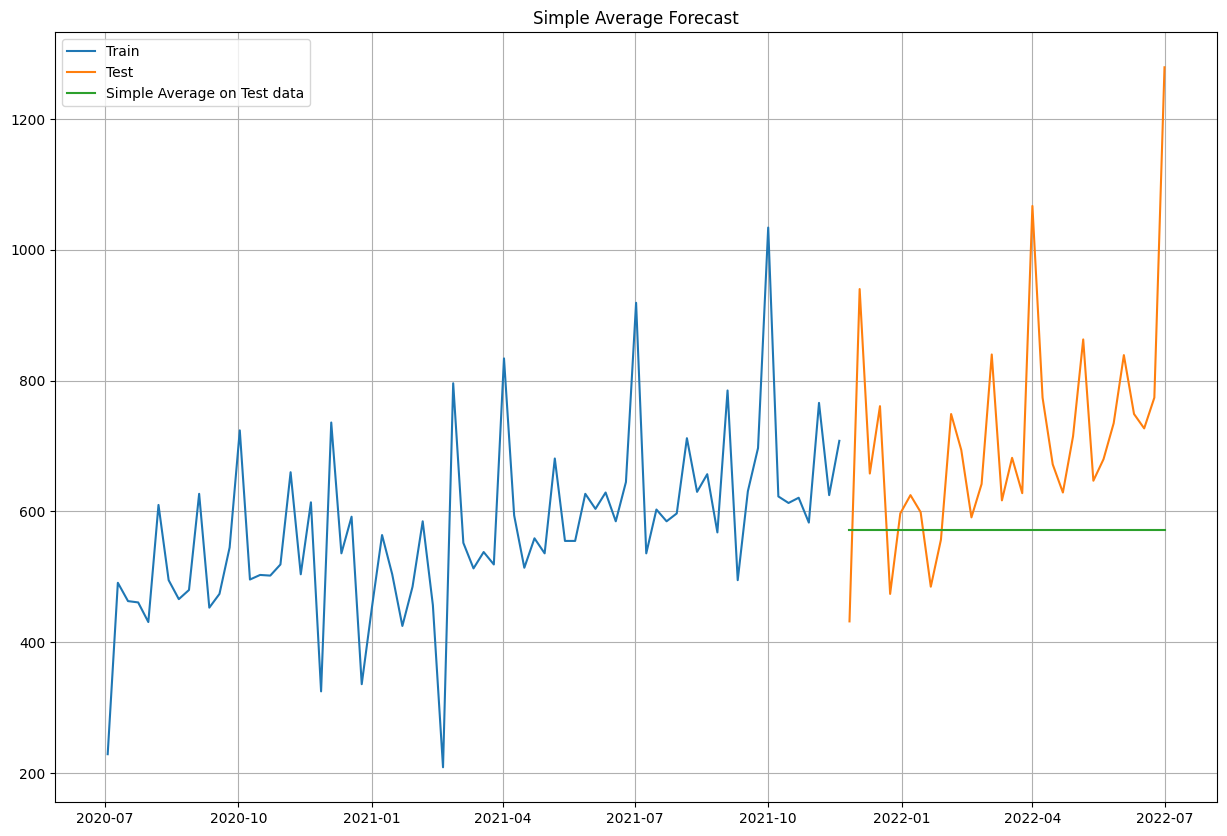

In [32]:
plt.plot(SimpleAvg_train['Vials'], label='Train')
plt.plot(SimpleAvg_test['Vials'], label='Test')
plt.plot(SimpleAvg_test['Mean_Forecast'], label='Simple Average on Test data')
plt.legend(loc='best')
plt.title('Simple Average Forecast')
plt.grid();

In [33]:
rmse_model3_test = metrics.mean_squared_error(test['Vials'], SimpleAvg_test['Mean_Forecast'], squared=False)
print('For Naive Model RMSE is %3.3f'%(rmse_model3_test))

For Naive Model RMSE is 214.546


In [34]:
resultsDF3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}, index=['Simple Average Model'])
resultsDF = pd.concat([resultsDF,resultsDF3])
resultsDF

,Test RMSE
Regression On Time,156.048229
Naive Model,164.513582
Simple Average Model,214.546295


## Method 4 : Moving Average

In [35]:
MovingAvg = grpd_data.copy()
MovingAvg.head()

,Vials
week,
2020-07-03,229.0
2020-07-10,491.0
2020-07-17,463.0
2020-07-24,461.0
2020-07-31,431.0


### Trailing Moving Average

In [36]:
MovingAvg['Trailing_2'] = MovingAvg['Vials'].rolling(2).mean()
MovingAvg['Trailing_4'] = MovingAvg['Vials'].rolling(4).mean()
MovingAvg['Trailing_6'] = MovingAvg['Vials'].rolling(6).mean()
MovingAvg['Trailing_9'] = MovingAvg['Vials'].rolling(9).mean()

In [37]:
MovingAvg.head()

,Vials,Trailing_2,Trailing_4,Trailing_6,Trailing_9
week,,,,,
2020-07-03,229.0,NaN,NaN,NaN,NaN
2020-07-10,491.0,360.0,NaN,NaN,NaN
2020-07-17,463.0,477.0,NaN,NaN,NaN
2020-07-24,461.0,462.0,411.0,NaN,NaN
2020-07-31,431.0,446.0,461.5,NaN,NaN


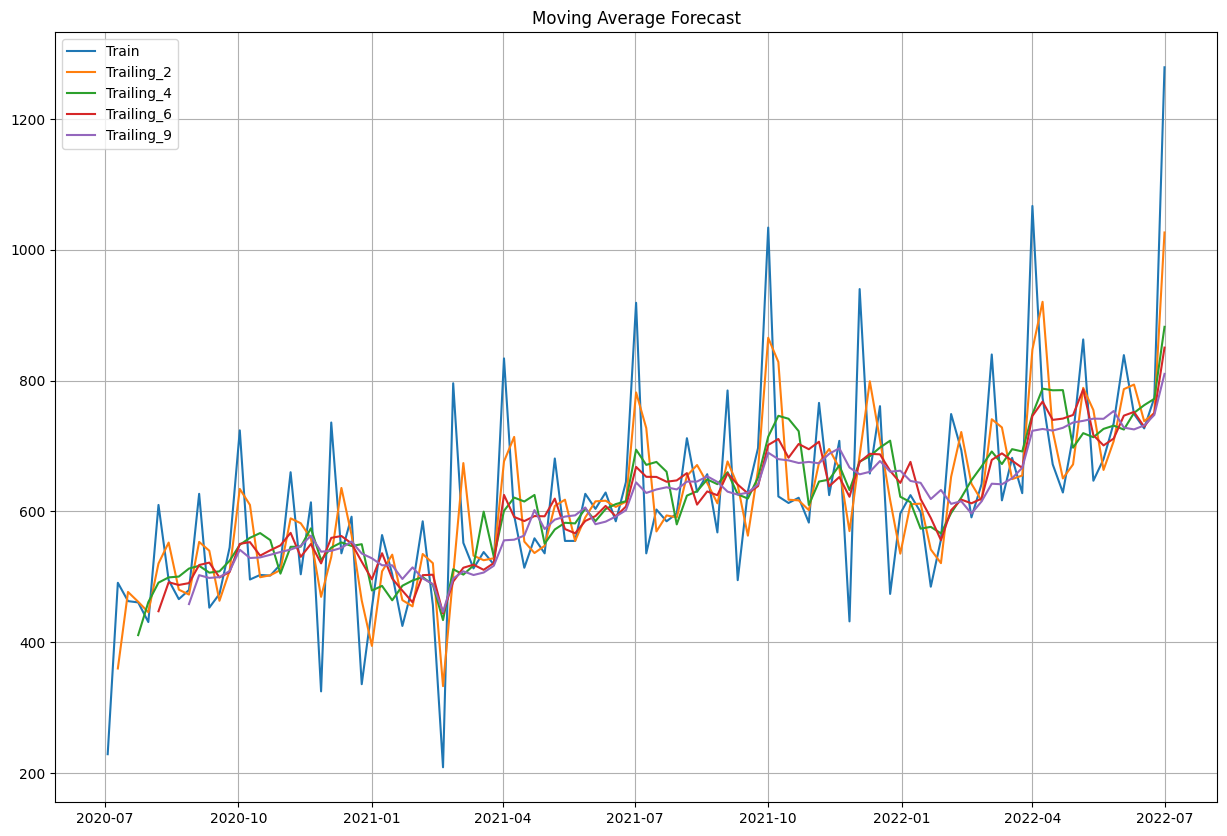

In [38]:
plt.plot(MovingAvg['Vials'], label='Train')
plt.plot(MovingAvg['Trailing_2'], label='Trailing_2')
plt.plot(MovingAvg['Trailing_4'], label='Trailing_4')
plt.plot(MovingAvg['Trailing_6'], label='Trailing_6')
plt.plot(MovingAvg['Trailing_9'], label='Trailing_9')

plt.legend(loc='best')
plt.title('Moving Average Forecast')
plt.grid();

In [39]:
# Creating Train and Test Set
trailing_MovingAvg_train = MovingAvg[0:int(len(MovingAvg)*0.7)]
trailing_MovingAvg_test = MovingAvg[int(len(MovingAvg)*0.7):]

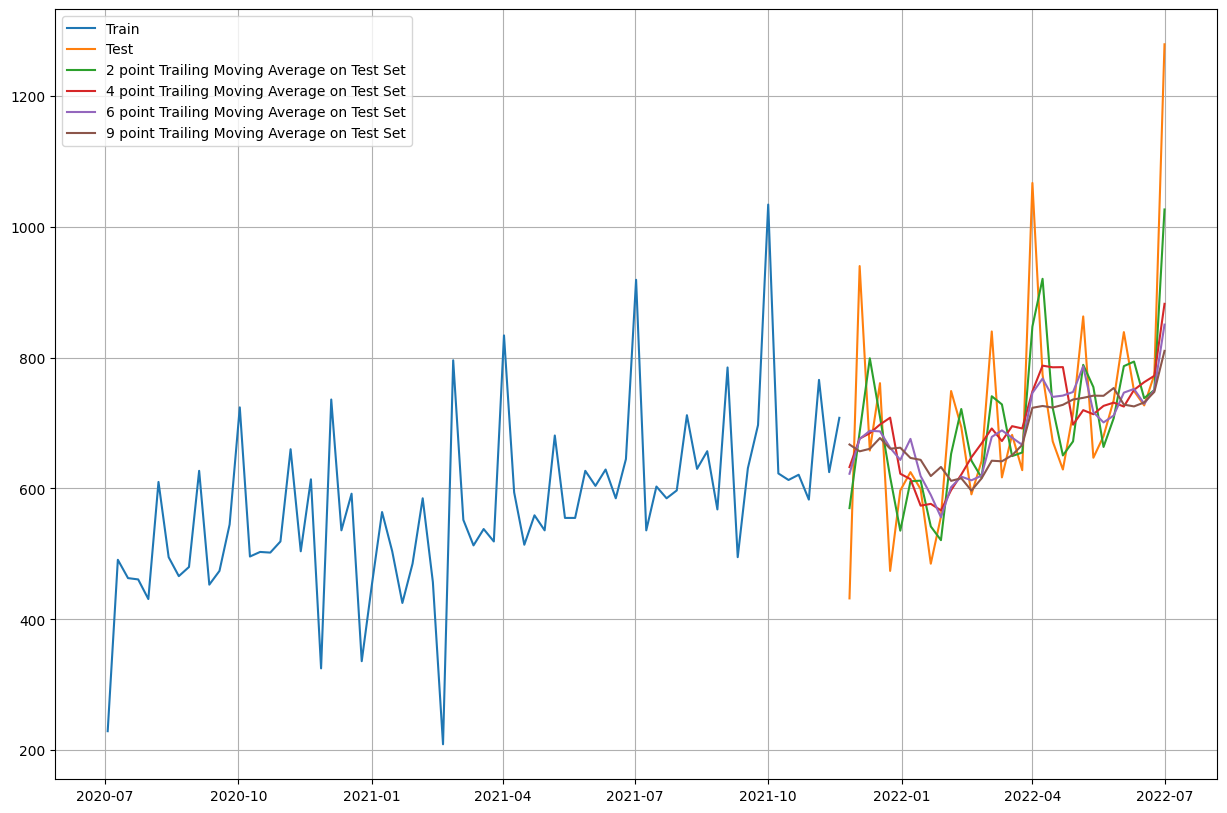

In [40]:
plt.figure(figsize=(15,10))
plt.plot(trailing_MovingAvg_train['Vials'], label='Train')
plt.plot(trailing_MovingAvg_test['Vials'], label='Test')

plt.plot(trailing_MovingAvg_test['Trailing_2'], label='2 point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAvg_test['Trailing_4'], label='4 point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAvg_test['Trailing_6'], label='6 point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAvg_test['Trailing_9'], label='9 point Trailing Moving Average on Test Set')

plt.legend(loc='best')
plt.grid();

In [41]:
rmse_model4_test2 = metrics.mean_squared_error(test['Vials'], trailing_MovingAvg_test['Trailing_2'], squared=False)
print('For 2 point Moving Average Model RMSE is %3.3f'%(rmse_model4_test2))

rmse_model4_test4 = metrics.mean_squared_error(test['Vials'], trailing_MovingAvg_test['Trailing_4'], squared=False)
print('For 4 point Moving Average Model RMSE is %3.3f'%(rmse_model4_test4))

rmse_model4_test6 = metrics.mean_squared_error(test['Vials'], trailing_MovingAvg_test['Trailing_6'], squared=False)
print('For 6 point Moving Average Model RMSE is %3.3f'%(rmse_model4_test6))

rmse_model4_test9 = metrics.mean_squared_error(test['Vials'], trailing_MovingAvg_test['Trailing_9'], squared=False)
print('For 9 point Moving Average Model RMSE is %3.3f'%(rmse_model4_test9))

For 2 point Moving Average Model RMSE is 102.249
For 4 point Moving Average Model RMSE is 134.486
For 6 point Moving Average Model RMSE is 131.223
For 9 point Moving Average Model RMSE is 144.794


In [42]:
resultsDF4 = pd.DataFrame({'Test RMSE': [rmse_model4_test2,rmse_model4_test4,rmse_model4_test6,rmse_model4_test9]},
                          index=['2 point Moving Average Model','4 point Moving Average Model','6 point Moving Average Model','9 point Moving Average Model'])
resultsDF = pd.concat([resultsDF,resultsDF4])
resultsDF

,Test RMSE
Regression On Time,156.048229
Naive Model,164.513582
Simple Average Model,214.546295
2 point Moving Average Model,102.248586
4 point Moving Average Model,134.485826
6 point Moving Average Model,131.223410
9 point Moving Average Model,144.793521


## Method 5 : Holt-Winters - TES - Linear Method with Additive Errors

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt

In [44]:
Holt_train = train.copy()
Holt_test = test.copy()

In [45]:
model_TES = ExponentialSmoothing(Holt_train, trend='additive', seasonal='additive', initialization_method='estimated')
model_TES = model_TES.fit()

C:\Users\sanand\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

##### We require minimum 3 years of data so that after splitting into train and test, train data should hold atleast 2 years of data so that model can learn the pattern of trend and seasonality

## Method 6 : LSTM

## LSTM Network for Regression

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [47]:
# fix random seed for reproducibility
tf.random.set_seed(7)
#tf.random.set_random_seed(7)
#tf.compat.v1.random.set_random_seed(7)

In [48]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(grpd_data)

In [49]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

73 32


In [50]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [51]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [52]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [53]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
71/71 - 5s - loss: 0.1057 - 5s/epoch - 65ms/step
Epoch 2/100
71/71 - 0s - loss: 0.0543 - 204ms/epoch - 3ms/step
Epoch 3/100
71/71 - 0s - loss: 0.0263 - 220ms/epoch - 3ms/step
Epoch 4/100
71/71 - 0s - loss: 0.0164 - 213ms/epoch - 3ms/step
Epoch 5/100
71/71 - 0s - loss: 0.0144 - 218ms/epoch - 3ms/step
Epoch 6/100
71/71 - 0s - loss: 0.0142 - 250ms/epoch - 4ms/step
Epoch 7/100
71/71 - 0s - loss: 0.0141 - 252ms/epoch - 4ms/step
Epoch 8/100
71/71 - 0s - loss: 0.0142 - 236ms/epoch - 3ms/step
Epoch 9/100
71/71 - 0s - loss: 0.0142 - 278ms/epoch - 4ms/step
Epoch 10/100
71/71 - 0s - loss: 0.0141 - 235ms/epoch - 3ms/step
Epoch 11/100
71/71 - 0s - loss: 0.0142 - 286ms/epoch - 4ms/step
Epoch 12/100
71/71 - 0s - loss: 0.0142 - 214ms/epoch - 3ms/step
Epoch 13/100
71/71 - 0s - loss: 0.0141 - 214ms/epoch - 3ms/step
Epoch 14/100
71/71 - 0s - loss: 0.0141 - 207ms/epoch - 3ms/step
Epoch 15/100
71/71 - 0s - loss: 0.0144 - 214ms/epoch - 3ms/step
Epoch 16/100
71/71 - 0s - loss: 0.0141 - 204ms/epoc

In [54]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 22ms/step
Train Score: 126.13 RMSE
Test Score: 168.62 RMSE


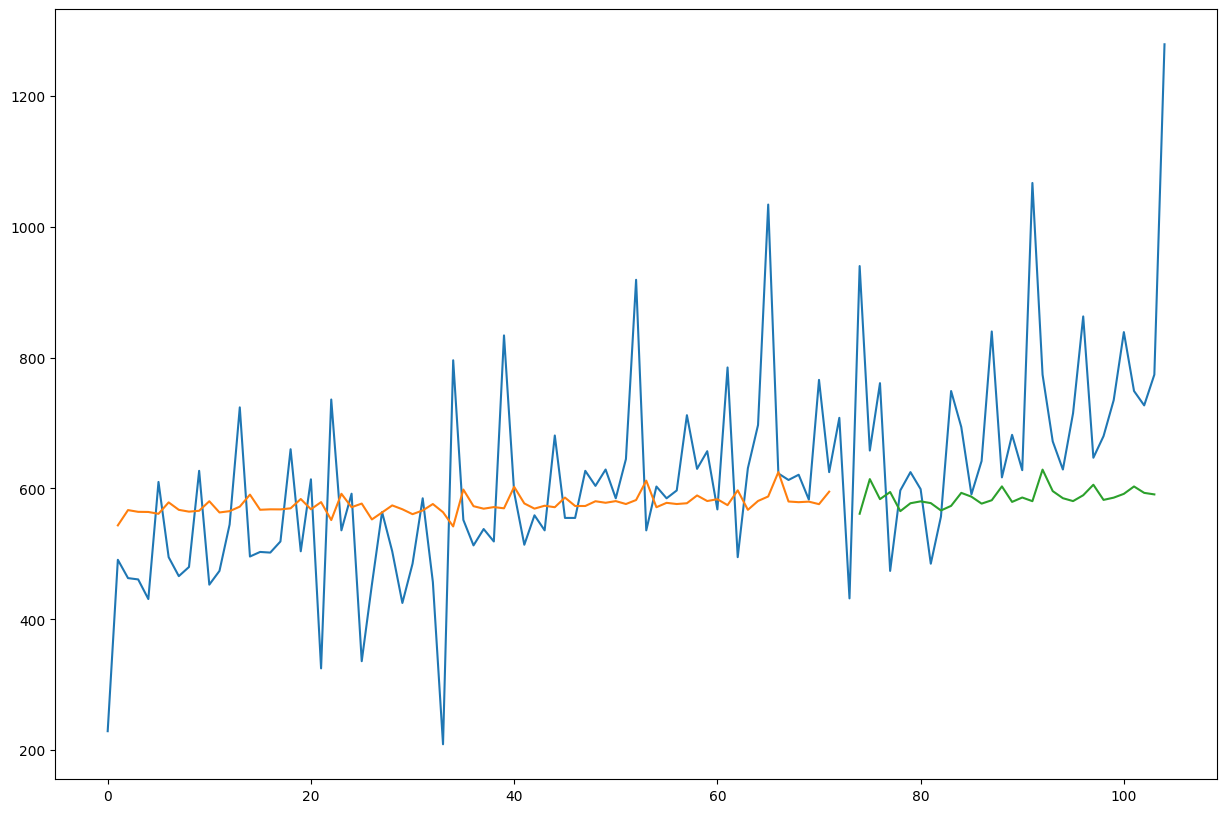

In [55]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM with Memory Between Batches

69/69 - 3s - loss: 0.1131 - 3s/epoch - 46ms/step
69/69 - 0s - loss: 0.0256 - 208ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0147 - 290ms/epoch - 4ms/step
69/69 - 0s - loss: 0.0150 - 203ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0149 - 215ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0148 - 224ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0148 - 210ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0147 - 202ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0147 - 199ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0146 - 204ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0146 - 210ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0145 - 208ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0145 - 222ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0145 - 228ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0144 - 203ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0144 - 197ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0144 - 215ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0143 - 207ms/epoch - 3ms/step
69/69 - 0s - loss: 0.0143 - 261ms/epoch - 4ms/step
69/69 - 0s - loss: 0.0143 - 235ms

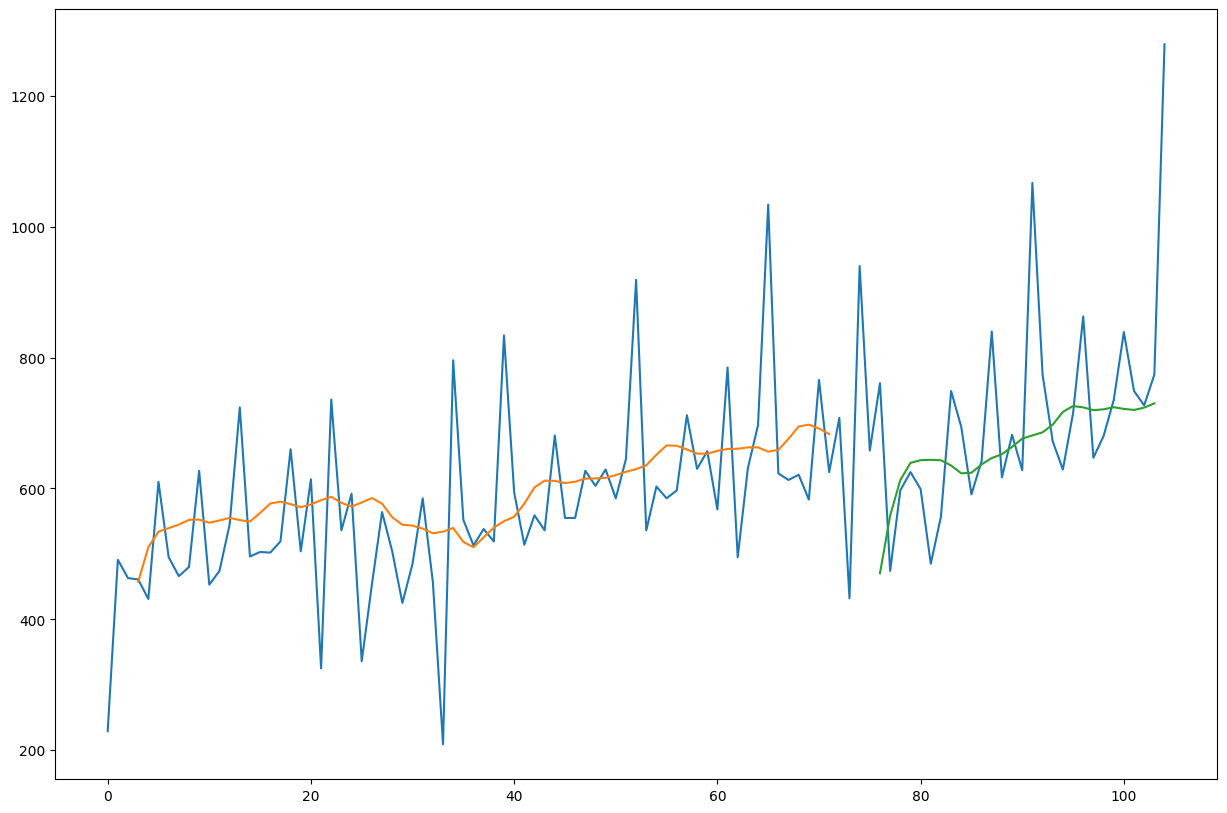

In [56]:
# LSTM with Memory Between Batches
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
# dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
# dataset = dataframe.values
# dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(grpd_data)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM for Regression Using the Window Method

Epoch 1/100
69/69 - 3s - loss: 0.0891 - 3s/epoch - 47ms/step
Epoch 2/100
69/69 - 0s - loss: 0.0353 - 222ms/epoch - 3ms/step
Epoch 3/100
69/69 - 0s - loss: 0.0172 - 181ms/epoch - 3ms/step
Epoch 4/100
69/69 - 0s - loss: 0.0149 - 189ms/epoch - 3ms/step
Epoch 5/100
69/69 - 0s - loss: 0.0143 - 193ms/epoch - 3ms/step
Epoch 6/100
69/69 - 0s - loss: 0.0145 - 196ms/epoch - 3ms/step
Epoch 7/100
69/69 - 0s - loss: 0.0143 - 206ms/epoch - 3ms/step
Epoch 8/100
69/69 - 0s - loss: 0.0144 - 224ms/epoch - 3ms/step
Epoch 9/100
69/69 - 0s - loss: 0.0144 - 225ms/epoch - 3ms/step
Epoch 10/100
69/69 - 0s - loss: 0.0143 - 223ms/epoch - 3ms/step
Epoch 11/100
69/69 - 0s - loss: 0.0143 - 200ms/epoch - 3ms/step
Epoch 12/100
69/69 - 0s - loss: 0.0143 - 214ms/epoch - 3ms/step
Epoch 13/100
69/69 - 0s - loss: 0.0144 - 234ms/epoch - 3ms/step
Epoch 14/100
69/69 - 0s - loss: 0.0142 - 211ms/epoch - 3ms/step
Epoch 15/100
69/69 - 0s - loss: 0.0142 - 228ms/epoch - 3ms/step
Epoch 16/100
69/69 - 0s - loss: 0.0141 - 220ms/epoc

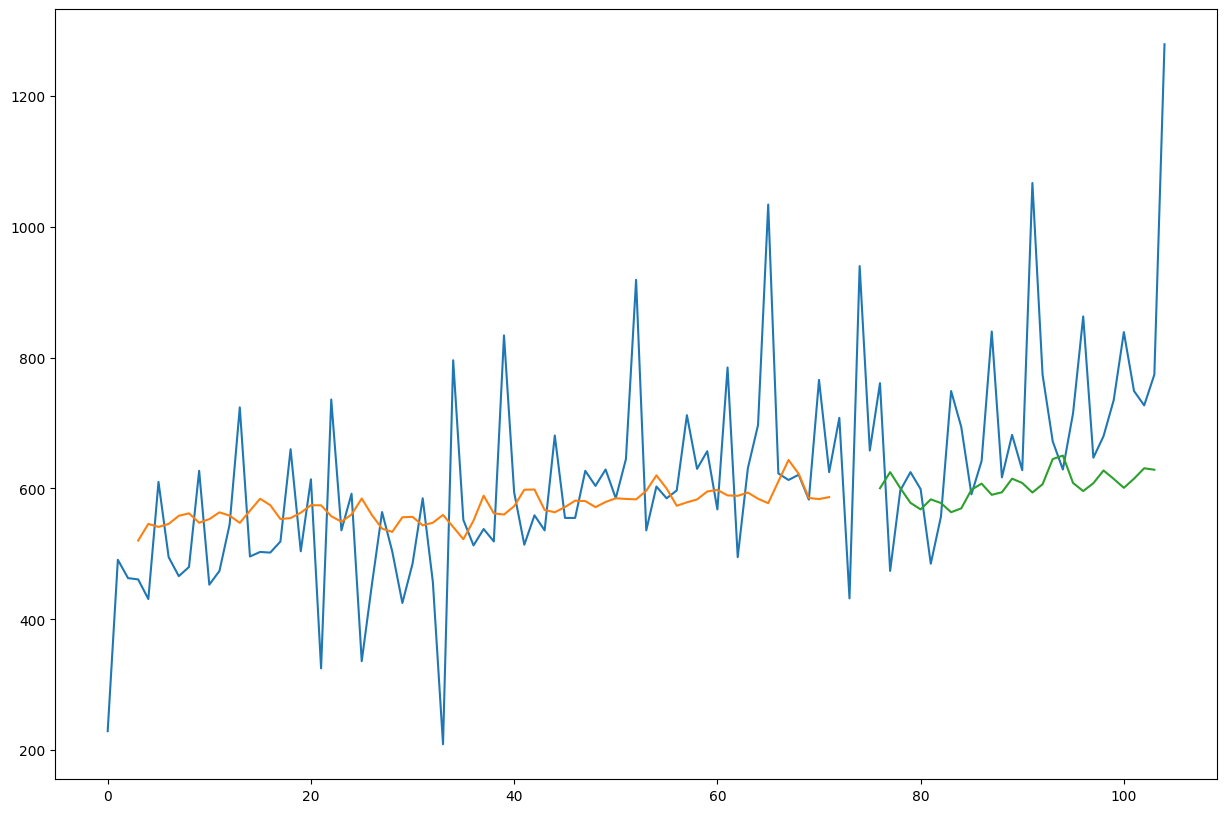

In [57]:
# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
# dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
# dataset = dataframe.values
# dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(grpd_data)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM for Regression with Time Steps

Epoch 1/100
69/69 - 5s - loss: 0.1573 - 5s/epoch - 68ms/step
Epoch 2/100
69/69 - 0s - loss: 0.0531 - 263ms/epoch - 4ms/step
Epoch 3/100
69/69 - 0s - loss: 0.0208 - 291ms/epoch - 4ms/step
Epoch 4/100
69/69 - 0s - loss: 0.0150 - 253ms/epoch - 4ms/step
Epoch 5/100
69/69 - 0s - loss: 0.0141 - 282ms/epoch - 4ms/step
Epoch 6/100
69/69 - 0s - loss: 0.0142 - 319ms/epoch - 5ms/step
Epoch 7/100
69/69 - 0s - loss: 0.0141 - 305ms/epoch - 4ms/step
Epoch 8/100
69/69 - 0s - loss: 0.0143 - 315ms/epoch - 5ms/step
Epoch 9/100
69/69 - 0s - loss: 0.0142 - 273ms/epoch - 4ms/step
Epoch 10/100
69/69 - 0s - loss: 0.0142 - 278ms/epoch - 4ms/step
Epoch 11/100
69/69 - 0s - loss: 0.0142 - 248ms/epoch - 4ms/step
Epoch 12/100
69/69 - 0s - loss: 0.0142 - 252ms/epoch - 4ms/step
Epoch 13/100
69/69 - 0s - loss: 0.0144 - 273ms/epoch - 4ms/step
Epoch 14/100
69/69 - 0s - loss: 0.0142 - 226ms/epoch - 3ms/step
Epoch 15/100
69/69 - 0s - loss: 0.0142 - 234ms/epoch - 3ms/step
Epoch 16/100
69/69 - 0s - loss: 0.0140 - 233ms/epoc

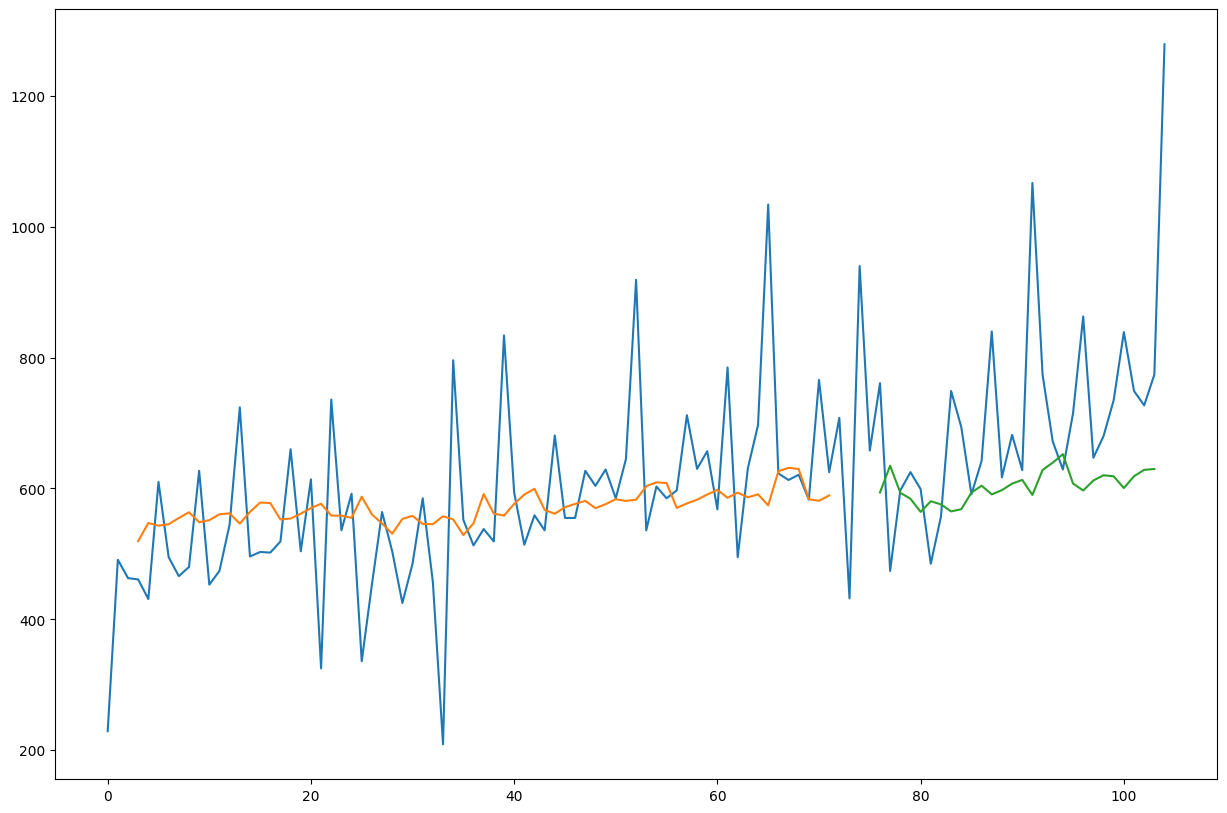

In [58]:
# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
# dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
# dataset = dataframe.values
# dataset = dataset.astype('float32')
# # normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(grpd_data)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Method 7 : ARIMA Model

C:\Users\sanand\AppData\Local\Temp\ipykernel_15904\487079262.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\sanand\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sanand\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=634.511734, expected=432.000000
predicted=704.957228, expected=940.000000
predicted=636.853375, expected=658.000000
predicted=708.493311, expected=761.000000
predicted=605.617506, expected=474.000000
predicted=762.400424, expected=597.000000
predicted=755.963206, expected=625.000000
predicted=713.618117, expected=599.000000
predicted=617.817076, expected=485.000000
predicted=573.327991, expected=557.000000
predicted=597.399749, expected=749.000000
predicted=595.143473, expected=694.000000
predicted=579.376993, expected=591.000000
predicted=579.760623, expected=642.000000
predicted=669.646628, expected=840.000000
predicted=708.886850, expected=617.000000
predicted=682.544424, expected=682.000000
predicted=648.675058, expected=628.000000
predicted=753.964003, expected=1067.000000
predicted=692.333300, expected=774.000000
predicted=738.990710, expected=672.000000
predicted=717.598633, expected=629.000000
predicted=880.548280, expected=715.000000
predicted=858.120817, expected=86

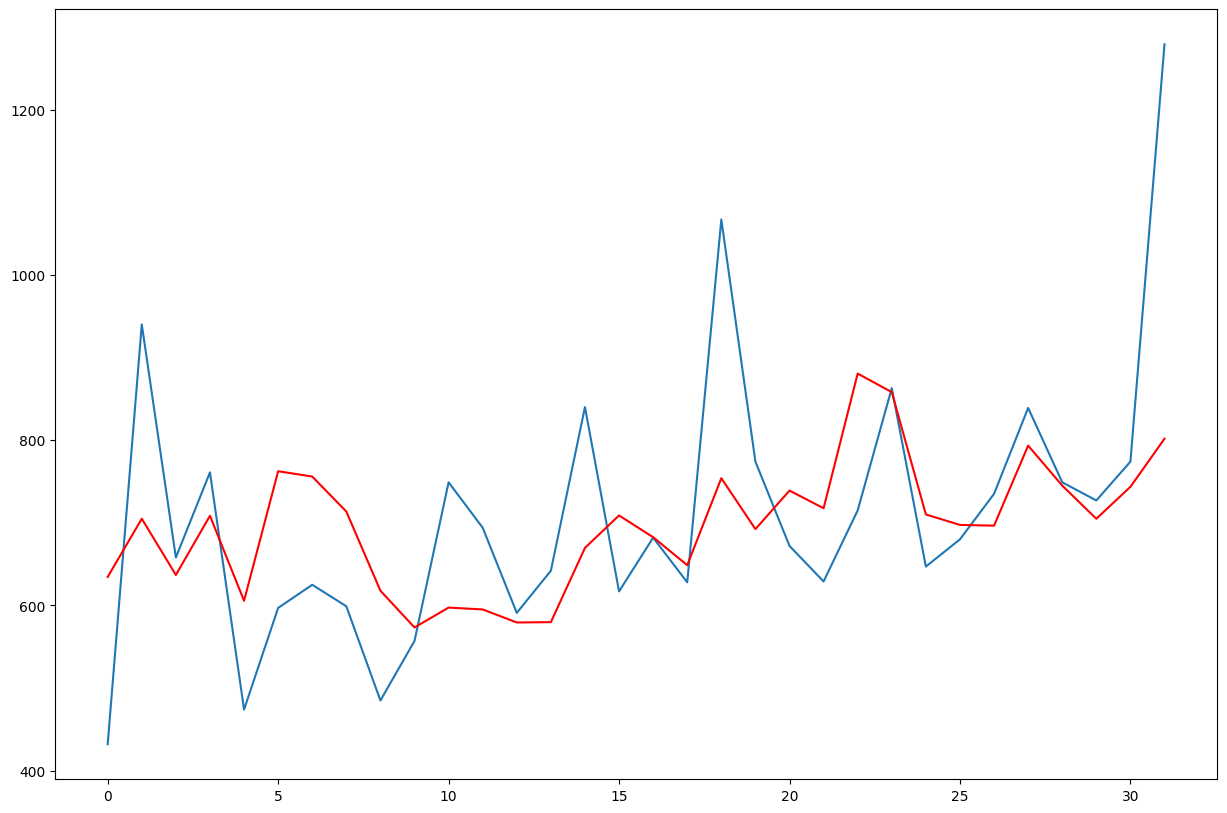

In [136]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
#series.index = series.index.to_period('M')
# split into train and test sets
X = grpd_data.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,1)) # Tried with different orders too
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**Also tried with different order but this order of (0,1,0) the RMSE is 204 but as we can see the graph the predicted model is exactly copy of the real value (maybe showcasing overfitting) but lags behind. Need to research why this lagging takes place.**

## Conclusion

In [137]:
resultsDF5 = pd.DataFrame({'Test RMSE': ['168.62','118.82','151.20','151.26 ','142.354']},
                          index=['LSTM Network for Regression','LSTM with Memory Between Batches','LSTM for Regression Using the Window Method','LSTM for Regression with Time Steps','ARIMA Model'])
resultsDF = pd.concat([resultsDF,resultsDF5])
resultsDF

,Test RMSE
Regression On Time,156.048229
Naive Model,164.513582
Simple Average Model,214.546295
2 point Moving Average Model,102.248586
4 point Moving Average Model,134.485826
6 point Moving Average Model,131.22341
9 point Moving Average Model,144.793521
LSTM Network for Regression,168.62
LSTM with Memory Between Batches,118.82
LSTM for Regression Using the Window Method,151.20


#### Conclusion:>    2-Point Moving Average Model has the lowest RMSE of 102.24.

### END